In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp
from jcopml.feature_importance import mean_score_decrease


#### Import data

In [9]:
data = pd.read_csv('E:\Data Science\Python\machine learning exercises\dataset\carprice.csv', index_col=0)

In [10]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90


#### Plot Missing Value

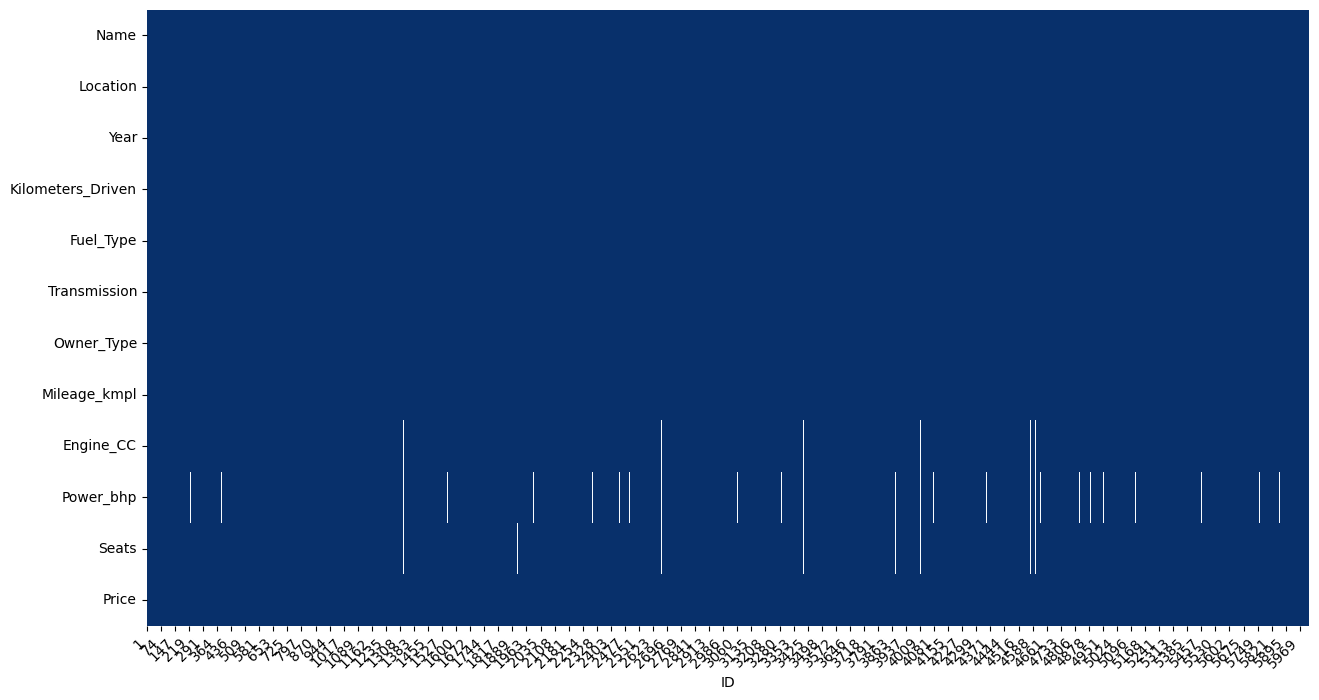

In [11]:
plot_missing_value(data)

In [12]:
data.drop('Name', axis=1, inplace=True)

#### Create Model Benchmark

In [13]:
X = data.drop(labels='Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape, X_test.shape

((4167, 10), (1786, 10))

In [15]:
num_col = list(X_train.select_dtypes(exclude='O').columns)
cat_col = list(X_train.select_dtypes(include='O').columns)

In [16]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, impute='median', scaling='robust'), num_col),
    ('categoric', cat_pipe(encoder='onehot'), cat_col)
])

model_pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

gsp_model = GridSearchCV(estimator=model_pipeline, param_grid=gsp.svm_poly_params, n_jobs=-1, verbose=1, cv=3)
gsp_model.fit(X_train, y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Year',
                                                                          'Kilometers_Driven',
                                                                          'Mileage_kmpl',
                                                                          'Engine_CC',
                                                                          'Power_bhp',
                                                                          'Seats']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strat...
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Owner_Type'])])),
                                       ('algo', SVR(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'prep__numeric__poly__degree': [1, 2, 3],
                         'prep__numeric__poly__interaction_only': [True,
                                                                   False]},
             verbose=1)

In [27]:
print("Best R-Squared Score : ", gsp_model.best_score_)
print("Data Train R-Squared Score : ", gsp_model.score(X_train, y_train))
print("Data Test R-Squared Score : ", gsp_model.score(X_test, y_test))


Best R-Squared Score :  0.8328211096683015
Data Train R-Squared Score :  0.8628652639116552
Data Test R-Squared Score :  0.798448579461662


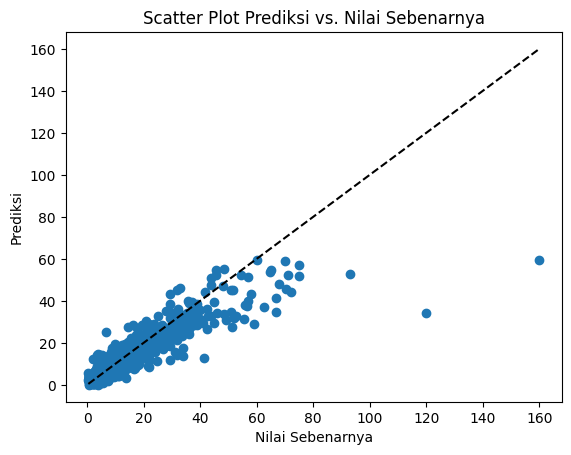

In [22]:
y_pred = gsp_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Scatter Plot Prediksi vs. Nilai Sebenarnya')
plt.show()

#### Feature Importance

,feature,importance,stdev
8,Power_bhp,0.497453,0.012897
1,Year,0.262635,0.011656
7,Engine_CC,0.174854,0.003800
4,Transmission,0.080854,0.005372
3,Fuel_Type,0.052285,0.003110
9,Seats,0.046326,0.003554
2,Kilometers_Driven,0.045875,0.001990
0,Location,0.022246,0.001294
6,Mileage_kmpl,0.019157,0.002066
5,Owner_Type,0.001496,0.000576


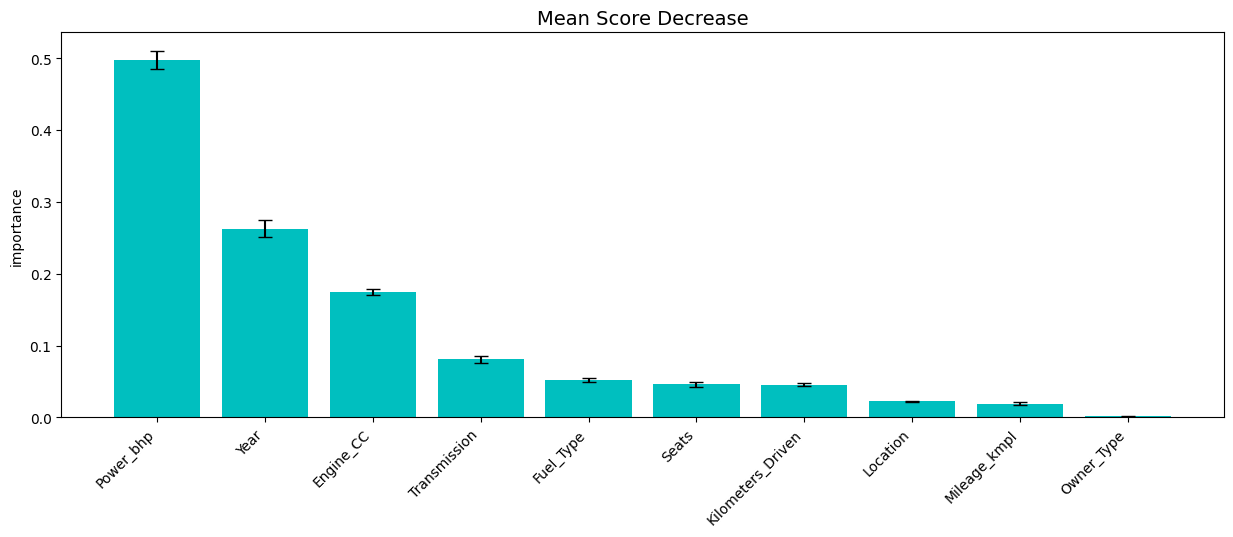

In [23]:
mean_score_decrease(X_train, y_train, model=gsp_model, plot=True)

- Fitur importance merupakan fitur yang memiliki pengaruh dalam menghasilkan score akhir dari sebuah model machine-learning